# Kind of Sentiment Analysis

## 1st try

In [ ]:
df = df.dropna()

X = df['statement']
y = df['status']

In [ ]:
X

,statement
0,oh my gosh
1,"trouble sleeping, confused mind, restless hear..."
2,"All wrong, back off dear, forward doubt. Stay ..."
3,I've shifted my focus to something else but I'...
4,"I'm restless and restless, it's been a month n..."
...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...
53039,"selfishness ""I don't feel very good, it's lik..."
53040,Is there any way to sleep better? I can't slee...
53041,"Public speaking tips? Hi, all. I have to give ..."


In [ ]:
from sklearn.preprocessing import OneHotEncoder

y_transformed = OneHotEncoder(sparse_output=False).fit_transform(y.values.reshape(-1, 1))
y_transformed

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X

,statement
0,oh my gosh
1,"trouble sleeping, confused mind, restless hear..."
2,"All wrong, back off dear, forward doubt. Stay ..."
3,I've shifted my focus to something else but I'...
4,"I'm restless and restless, it's been a month n..."
...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...
53039,"selfishness ""I don't feel very good, it's lik..."
53040,Is there any way to sleep better? I can't slee...
53041,"Public speaking tips? Hi, all. I have to give ..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

tfidfv = TfidfVectorizer()

X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(X, y_transformed, random_state=42, stratify=y_transformed)
X_val, X_test, y_val_transformed, y_test_transformed = train_test_split(X_test, y_test_transformed, random_state=42, stratify=y_test_transformed)


text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        lowercase=True,
        strip_accents='unicode',
        token_pattern=r'[a-zA-Z]+', # Only keep letters (removes numbers, punctuation)
        # preprocessor=lambda x: x, # text in, text out
        min_df=2, # ignore terms that appear in less than 2 documents (rows)
        max_df=0.95, # ignore terms that appear in more than 95% of the documents (rows)
        ngram_range=(1, 2), # 1 grams (unigrams) and 2 grams (bigrams),
        max_features=100
        )),
    ('scaler', StandardScaler(with_mean=False))
])



X_train_transformed = text_pipeline.fit_transform(X_train)
X_val_transformed = text_pipeline.transform(X_val)
X_test_transformed = text_pipeline.transform(X_test)

In [ ]:
np.unique(y.values).shape

(7,)

In [ ]:
y_val_transformed

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
import os

os.listdir()

['.config', 'my_model', 'sample_data']

In [ ]:
if 'my_model' in os.listdir():
  shutil.rmtree('/content/my_model')
  os.mkdir('/content/my_model')

else:
  os.mkdir('/content/my_model')

In [ ]:
X_train_transformed.shape

(39510, 100)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train_transformed.shape[1:]),

    tf.keras.layers.Dense(units=64, kernel_initializer='he_normal'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(units=64, kernel_initializer='he_normal'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(units=64, kernel_initializer='he_normal'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(7, activation='softmax', kernel_initializer='glorot_uniform')
])


model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['accuracy'])


checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/my_model/my_model.keras',
    monitor="val_loss",
    save_best_only=True,
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=30,
    mode="auto",
    restore_best_weights=True,
)

reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    min_delta=0.0001,
    min_lr=0.0
)

# X_train_transformed_2, _, y_train_transformed_2, _ = train_test_split(X_train_transformed, y_train_transformed, train_size=0.05,
#                                                                     random_state=42, stratify=y_train_transformed)



history = model.fit(X_train_transformed, y_train_transformed, epochs=100,
                    validation_data=(X_val_transformed, y_val_transformed),
                    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_on_plateau])





Epoch 1/100


Exception ignored in: <function _xla_gc_callback at 0x7f804cadaf20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


1235/1235 ━━━━━━━━━━━━━━━━━━━━ 348s 210ms/step - accuracy: 0.4755 - loss: 1.6146 - val_accuracy: 0.4673 - val_loss: 1.4410 - learning_rate: 0.1000
Epoch 2/100
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.3260 - loss: 1.5915 - val_accuracy: 0.3102 - val_loss: 1.6059 - learning_rate: 0.1000
Epoch 3/100
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.3117 - loss: 1.6069 - val_accuracy: 0.3180 - val_loss: 1.6143 - learning_rate: 0.1000
Epoch 4/100
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3148 - loss: 1.6066 - val_accuracy: 0.3102 - val_loss: 1.6067 - learning_rate: 0.1000
Epoch 5/100
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3123 - loss: 1.6058 - val_accuracy: 0.3102 - val_loss: 1.6030 - learning_rate: 0.1000
Epoch 6/100
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3117 - loss: 1.6133 - val_accuracy: 0.3180 - val_loss: 1.6087 - learning_rate: 0.1000
Epoch 7/100
1235/1235 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.

In [ ]:
model.evaluate(X_test_transformed, y_test_transformed)

103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.4692 - loss: 1.4435


[1.4483157396316528, 0.46735498309135437]

## 2nd try

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

100%|██████████| 11.1M/11.1M [00:01<00:00, 7.36MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv(path + '/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
# df['status'].value_counts()

In [ ]:
# df['status'].unique()

In [ ]:
vocab = ['Normal', 'Stress', 'Anxiety', 'Bipolar', 'Depression', 'Personality disorder', 'Suicidal']

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(vocab)

y_full = tokenizer.texts_to_sequences(df['status'].values)

In [ ]:
# df['statement']

In [ ]:
import re

In [ ]:
def clean_text(text):
  # text = re.sub(r'\d+', '', text)
  # text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  return text.lower().strip()

df['statement'] = df['statement'].apply(clean_text)

# df['statement']


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10_000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['statement'])
sequences = tokenizer.texts_to_sequences(df['statement'])
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=200)

In [ ]:
X = padded_sequences

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

y = oe.fit_transform(df['status'].values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10_000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath='my_model.weights.h5',
    monitor="val_loss",
    mode='min',
    save_best_only=True,
    save_weights_only=True,
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    mode='min',
    min_delta=0.01,
    patience=20,
    restore_best_weights=True,
)

reduce_lr_on_plateau_cb = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    mode='max',
    factor=0.5,
    patience=5,
    min_delta=0.0001,
    min_lr=0.0
)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])



In [ ]:
history = model.fit(X_train, y_train, epochs=50,
          validation_data=(X_val, y_val),
          callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_on_plateau_cb])

Epoch 1/50
995/995 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.0527 - loss: -10505.6875 - val_accuracy: 0.0543 - val_loss: -95015.9453 - learning_rate: 0.0100
Epoch 2/50
995/995 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.0536 - loss: -150446.6875 - val_accuracy: 0.0543 - val_loss: -358663.5625 - learning_rate: 0.0100
Epoch 3/50
995/995 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.0528 - loss: -452420.9688 - val_accuracy: 0.0543 - val_loss: -756703.8125 - learning_rate: 0.0100
Epoch 4/50
995/995 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.0531 - loss: -874463.7500 - val_accuracy: 0.0543 - val_loss: -1263154.6250 - learning_rate: 0.0100
Epoch 5/50
995/995 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.0550 - loss: -1402508.6250 - val_accuracy: 0.0543 - val_loss: -1867634.1250 - learning_rate: 0.0100
Epoch 6/50
995/995 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.0541 - loss: -2041261.6250 - val_accuracy: 0.0543 - val_loss: -2565114.5000 - learning_rate: 0.0100
E

KeyboardInterrupt: 

## Again with tfidfvectorizer and MultinomialNB

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1


In [ ]:
df = pd.read_csv(path + '/Combined Data.csv')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


<Axes: xlabel='status'>

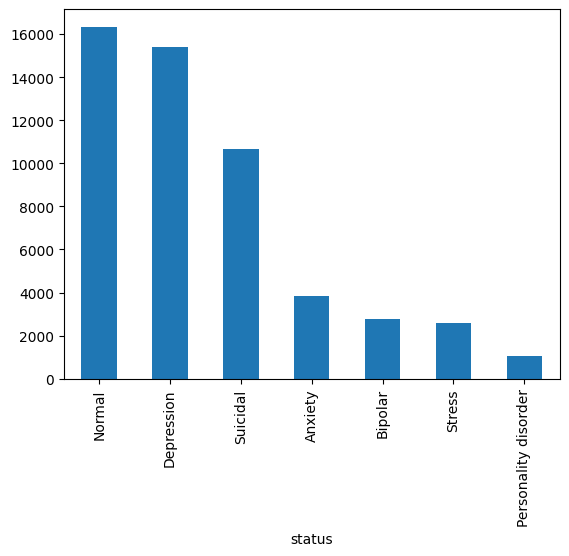

In [ ]:
df['status'].value_counts().plot.bar()

In [ ]:
df = df.dropna()

In [ ]:
X = df['statement']
y = df['status']

In [ ]:
classes = [['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar', 'Personality disorder']]

oe = OrdinalEncoder(categories=classes)

y_transformed = oe.fit_transform(y.values.reshape(-1, 1))
y_transformed

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
text_preprocessor = TfidfVectorizer(
      sublinear_tf=True,
      max_df=0.5,
      min_df=5,
      stop_words="english"
  )

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

X_train_transformed = text_preprocessor.fit_transform(X_train)
X_test_transformed = text_preprocessor.transform(X_test)

In [ ]:
models = {
    'Multinomial Naive-Bayes': MultinomialNB(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Complement Naive-Bayes': ComplementNB(alpha=0.1),
    'SGD Classifier': SGDClassifier(early_stopping=True, loss='log_loss', n_iter_no_change=3),
    'Ridge Classifier': RidgeClassifier(solver='sparse_cg'),
    'Linear SVC': LinearSVC(C=0.1, dual=False),
    'Logistic Regression': LogisticRegression(C=5, max_iter=1000),
    'Nearest Centroid': NearestCentroid()
}

for name, model in models.items():
  model.fit(X_train_transformed, y_train.ravel())
  print(f'{name} score on test data:')
  print(f'{model.score(X_test_transformed, y_test.ravel())}')
  print('\n')

Multinomial Naive-Bayes score on test data:
0.6321533643351998


K-Nearest Neighbors Classifier score on test data:
0.3241909461896175


Complement Naive-Bayes score on test data:
0.6388915251020214


SGD Classifier score on test data:
0.7184208028850717


Ridge Classifier score on test data:
0.7356932713296005


Linear SVC score on test data:
0.7561924646483819


Logistic Regression score on test data:
0.7597039005409509


Nearest Centroid score on test data:
0.6806491411217614




In [ ]:
estimators = []

for name, model in models.items():
  estimators.append(make_pipeline(text_preprocessor, model))

for estimator, name in zip(estimators, models.keys()):
  print(f'{name} :')
  start = time()
  print(cross_val_score(estimator, X, y))
  print(f'it took {time() - start} seconds')
  print('\n')

Multinomial Naive-Bayes :
[0.60510582 0.64246393 0.55922551 0.61351557 0.56577449]
it took 20.258968830108643 seconds


K-Nearest Neighbors Classifier :
[0.31118914 0.3114085  0.31083903 0.31501519 0.31824222]
it took 125.29463124275208 seconds


Complement Naive-Bayes :
[0.59732372 0.62006454 0.56928626 0.5905467  0.56862187]
it took 19.938446044921875 seconds


SGD Classifier :
[0.66271235 0.70690964 0.68716781 0.70814351 0.66562263]
it took 23.81682825088501 seconds


Ridge Classifier :
[0.66764734 0.70577069 0.69713364 0.7222855  0.67853075]
it took 35.54104161262512 seconds


Linear SVC :
[0.69051912 0.73376993 0.71194002 0.74582384 0.70852316]
it took 38.3053936958313 seconds


Logistic Regression :
[0.69792161 0.73025816 0.69998102 0.75294229 0.72418375]
it took 163.42650508880615 seconds


Nearest Centroid :
[0.64686343 0.69077449 0.65100607 0.66628702 0.60317008]
it took 76.93290591239929 seconds




                      precision    recall  f1-score   support

             Anxiety       0.65      0.59      0.62      3841
              Normal       0.75      0.93      0.83     16343
          Depression       0.63      0.53      0.58     15404
            Suicidal       0.61      0.63      0.62     10652
              Stress       0.48      0.30      0.37      2587
             Bipolar       0.75      0.69      0.72      2777
Personality disorder       0.68      0.45      0.54      1077

            accuracy                           0.68     52681
           macro avg       0.65      0.59      0.61     52681
        weighted avg       0.67      0.68      0.67     52681








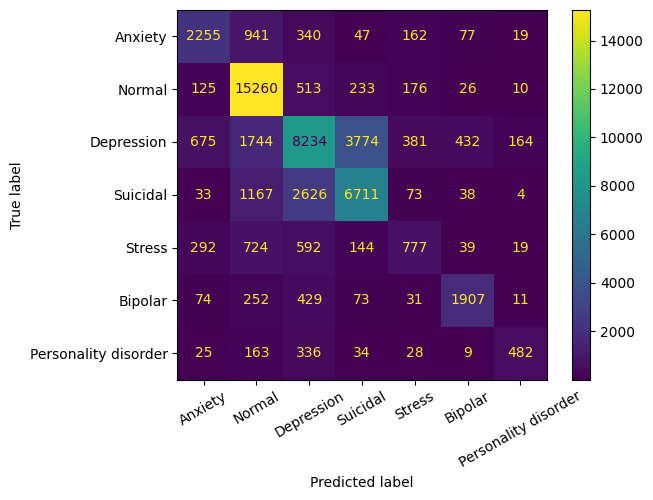

In [ ]:
lin_svc_pipe = make_pipeline(
    text_preprocessor,
    LinearSVC(C=0.1, dual=False)
)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(lin_svc_pipe, X, y_transformed, cv=3, n_jobs=-1)
print(classification_report(y_transformed, predictions, target_names=classes[0]))
print('\n'*4)

ConfusionMatrixDisplay.from_predictions(y_transformed, predictions, display_labels=classes[0], xticks_rotation=30)
plt.show()

In [ ]:
y.unique().shape

(7,)

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=X_train_transformed.shape[1:]),

        tf.keras.layers.Dense(units=32,
                              kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        tf.keras.layers.Dense(units=32,
                              kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        tf.keras.layers.Dense(units=32,
                              kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),

        tf.keras.layers.Dense(units=7)

    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
    )

In [ ]:
escb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=12,
    mode='min',
    restore_best_weights=True,
)

rlrop = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    mode='min'
)

In [ ]:
tf.random.set_seed(42)

history = model.fit(X_train_transformed, y_train, batch_size=64, epochs=50, validation_split=0.2, callbacks=[escb, rlrop])

Epoch 1/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5374 - loss: 2.7294 - val_accuracy: 0.6196 - val_loss: 2.7215 - learning_rate: 0.0100
Epoch 2/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6178 - loss: 2.7778 - val_accuracy: 0.6091 - val_loss: 2.7446 - learning_rate: 0.0100
Epoch 3/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6180 - loss: 2.8089 - val_accuracy: 0.6180 - val_loss: 2.8032 - learning_rate: 0.0100
Epoch 4/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6178 - loss: 2.8216 - val_accuracy: 0.6274 - val_loss: 2.8167 - learning_rate: 0.0100
Epoch 5/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6225 - loss: 2.7856 - val_accuracy: 0.5627 - val_loss: 2.8029 - learning_rate: 0.0100
Epoch 6/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6209 - loss: 2.7591 - val_accuracy: 0.6223 - val_loss: 2.8674 - learning_rate: 0.0100
Epoch 7/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6169 - loss

In [ ]:
history_2 = model.fit(X_train_transformed, y_train, batch_size=64, epochs=50, validation_split=0.2, callbacks=[escb, rlrop])

Epoch 1/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7444 - loss: 1.1873 - val_accuracy: 0.7303 - val_loss: 1.2068 - learning_rate: 0.0012
Epoch 2/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7410 - loss: 1.1816 - val_accuracy: 0.7106 - val_loss: 1.2236 - learning_rate: 0.0012
Epoch 3/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7411 - loss: 1.1769 - val_accuracy: 0.7150 - val_loss: 1.2146 - learning_rate: 0.0012
Epoch 4/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7387 - loss: 1.1823 - val_accuracy: 0.7316 - val_loss: 1.1884 - learning_rate: 0.0012
Epoch 5/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7430 - loss: 1.1858 - val_accuracy: 0.7308 - val_loss: 1.2007 - learning_rate: 0.0012
Epoch 6/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7422 - loss: 1.1840 - val_accuracy: 0.7293 - val_loss: 1.1925 - learning_rate: 0.0012
Epoch 7/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7479 - loss:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_transformed, y_test)

print(f'test accuracy: {test_accuracy}')

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7215 - loss: 1.2017
test accuracy: 0.7202239632606506


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_transformed, y_test)

print(f'test accuracy: {test_accuracy}')

330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7423 - loss: 0.9290
test accuracy: 0.7403435707092285


In [ ]:
len(history.history['loss'] + history_2.history['loss'])

85

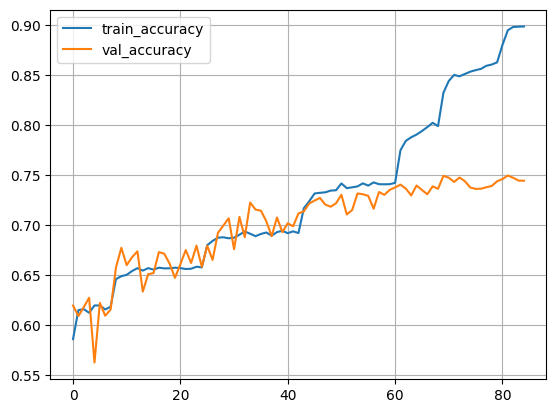

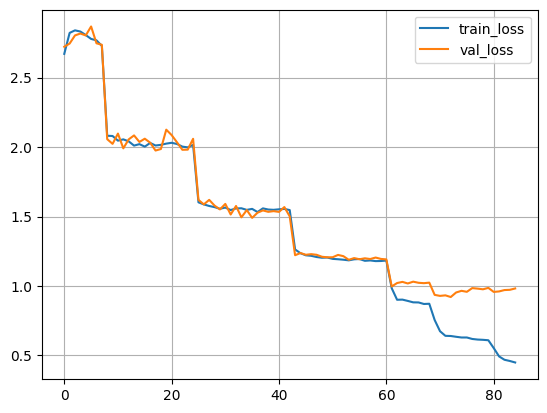

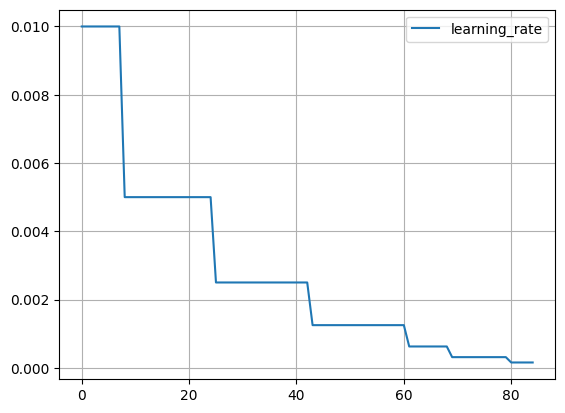

In [ ]:
plt.plot(history.history['accuracy'] + history_2.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'] + history_2.history['val_accuracy'], label='val_accuracy')
plt.grid()
plt.legend()
plt.show()

plt.plot(history.history['loss'] + history_2.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'] + history_2.history['val_loss'], label='val_loss')
plt.grid()
plt.legend()
plt.show()

plt.plot(history.history['learning_rate'] + history_2.history['learning_rate'], label='learning_rate')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Logistic Regression seems to perform better

In [ ]:
lin_svc = ['0.69051912', '0.73376993', '0.71194002', '0.74582384', '0.70852316']
log_reg = ['0.69792161', '0.73025816', '0.69998102', '0.75294229', '0.72418375']

summ = 0
for i in range(5):
  summ += float(lin_svc[i])

print('lin_svc mean:', summ / 5)


summ = 0
for i in range(5):
  summ += float(log_reg[i])

print('log_reg mean:', summ / 5)


lin_svc mean: 0.718115214
log_reg mean: 0.7210573659999999


## Will try it with TfidfVectorizer again

In [ ]:
df.fillna('', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  53043 non-null  object
 1   status     53043 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 828.9+ KB


In [ ]:
X = df['statement']
y = df['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("all", X.shape, y.shape)
print("train", X_train.shape, y_train.shape)
print("test", X_test.shape, y_test.shape)

all (53043,) (53043,)
train (47738,) (47738,)
test (5305,) (5305,)


In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt

In [ ]:
text_pipeline = make_pipeline(
    TfidfVectorizer(
        stop_words='english',
        token_pattern=r'[a-zA-Z]+', # Only keep letters (removes numbers, punctuation)
        preprocessor=lambda x: x, # text in, text out
        min_df=2, # ignore terms that appear in less than 2 documents (rows)
        max_df=0.95, # ignore terms that appear in more than 95% of the documents (rows)
        ngram_range=(1, 2), # 1 grams (unigrams) and 2 grams (bigrams)
        max_features=500 # limit the number of features to 500
        ),
)


X_train_transformed = text_pipeline.fit_transform(X_train)
X_test_transformed = text_pipeline.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((47738, 500), (5305, 500))

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train.to_numpy().ravel())
y_test_label = label_encoder.transform(y_test.to_numpy().ravel())

onehot_encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = onehot_encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test.to_numpy().reshape(-1, 1))

In [ ]:
tf.keras.backend.clear_session()

normalization_layer = tf.keras.layers.Normalization()
normalization_layer.adapt(X_train_transformed.toarray())

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_transformed.shape[1:]),

    normalization_layer,

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(y_train_onehot.shape[1], activation='softmax')
])


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'f1_score'])

In [ ]:
rlrop = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=10,
    factor=0.5,
    restore_best_weights=True
    )

mcp = tf.keras.callbacks.ModelCheckpoint(
    "sentiment_model.keras",
    save_best_only=True
    )

history = model.fit(
    X_train_transformed, y_train_onehot,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_transformed, y_test_onehot),
    callbacks = [rlrop, mcp]
    )

Epoch 1/20
746/746 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3751 - f1_score: 0.2291 - loss: 2.1676 - val_accuracy: 0.6535 - val_f1_score: 0.4126 - val_loss: 1.3128 - learning_rate: 0.0010
Epoch 2/20
746/746 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6166 - f1_score: 0.3988 - loss: 1.3627 - val_accuracy: 0.6907 - val_f1_score: 0.4833 - val_loss: 1.1133 - learning_rate: 0.0010
Epoch 3/20
746/746 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6678 - f1_score: 0.4703 - loss: 1.1829 - val_accuracy: 0.6967 - val_f1_score: 0.5102 - val_loss: 1.0434 - learning_rate: 0.0010
Epoch 4/20
746/746 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6820 - f1_score: 0.4989 - loss: 1.0957 - val_accuracy: 0.7129 - val_f1_score: 0.5542 - val_loss: 0.9846 - learning_rate: 0.0010
Epoch 5/20
746/746 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7010 - f1_score: 0.5370 - loss: 1.0223 - val_accuracy: 0.7172 - val_f1_score: 0.5723 - val_loss: 0.9463 - learning_rate: 0.0010
Epoch 6/20
746/746 ━━━━━━━

In [ ]:
predicted = model.predict(text_pipeline.transform(['terrible! Absolutely disliked it']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


In [ ]:
np.argmax(predicted[0])

1

1

## Another try

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1


In [ ]:
df = pd.read_csv(path + '/Combined Data.csv')
df.head(3)

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
  text = re.sub(r'\d+', '', str(text))
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.lower()
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['statement'] = df['statement'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
status_mapping = {'Anxiety': 0, 'Normal': 1, 'Depression': 2, 'Suicidal': 3, 'Stress': 4, 'Bipolar': 5, 'Personality disorder': 6}
df['status'] = df['status'].map(status_mapping)

y = to_categorical(df['status'], num_classes=7)

In [ ]:
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(df['statement'])
X = tokenizer.texts_to_sequences(df['statement'])

In [ ]:
maxlen = 20  # Adjust maxlen as needed
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 classes for status

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# do some callbacks maybe

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

mccb = ModelCheckpoint(
    filepath='my_model.keras',
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)

escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    mode="min",
    restore_best_weights=True,
)

rlrop = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=5,
    mode="min",
    min_delta=0.0001,
    min_lr=0.0
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[mccb, escb, rlrop])

Epoch 1/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.5719 - loss: 1.1406 - val_accuracy: 0.6420 - val_loss: 0.9168 - learning_rate: 0.0100
Epoch 2/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 79s 69ms/step - accuracy: 0.6545 - loss: 0.8836 - val_accuracy: 0.6470 - val_loss: 0.9031 - learning_rate: 0.0100
Epoch 3/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 74s 70ms/step - accuracy: 0.6668 - loss: 0.8554 - val_accuracy: 0.6508 - val_loss: 0.9205 - learning_rate: 0.0100
Epoch 4/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 71s 67ms/step - accuracy: 0.6693 - loss: 0.8550 - val_accuracy: 0.6472 - val_loss: 0.9376 - learning_rate: 0.0100
Epoch 5/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 85s 70ms/step - accuracy: 0.6663 - loss: 0.8549 - val_accuracy: 0.6485 - val_loss: 0.9767 - learning_rate: 0.0100
Epoch 6/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 80s 69ms/step - accuracy: 0.6673 - loss: 0.8592 - val_accuracy: 0.6303 - val_loss: 1.0006 - learning_rate: 0.0100
Epoch 7/20
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 75s 71ms/step - accura

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

332/332 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6674 - loss: 0.8734
Test Accuracy: 66.13%


In [ ]:
sample_text = "I am feeling depressed today."
sample_text = clean_text(sample_text)
sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=max_len)
prediction = model.predict(sample_padded)
predicted_label = list(status_mapping.keys())[prediction.argmax()]  # Map back to label
print(f'Predicted Status: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Status: Normal
